# **IMPORT DATA**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dataset = "/content/drive/MyDrive/KULIAH/SKRIPSIDATA/Data/customer_shopping_data.csv"
dataset = "/content/drive/MyDrive/Private Class Ocha Putri - K Means & Fuzzy C Means/Data/customer_shopping_data.csv"

In [ ]:
df = pd.read_csv(dataset)

In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


# **PREPROCESSING DATA**

In [ ]:
# lihat ringkasan singkat setiap kolom dalam kumpulan data kita
df.describe(include='all')

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457.000000,99457,99457.000000,99457.000000,99457,99457,99457
unique,99457,99457,2,NaN,8,NaN,NaN,3,797,10
top,I138884,C241288,Female,NaN,Clothing,NaN,NaN,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,NaN,34487,NaN,NaN,44447,159,19943
mean,NaN,NaN,NaN,43.427089,NaN,3.003429,689.256321,NaN,NaN,NaN
std,NaN,NaN,NaN,14.990054,NaN,1.413025,941.184567,NaN,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,1.000000,5.230000,NaN,NaN,NaN
25%,NaN,NaN,NaN,30.000000,NaN,2.000000,45.450000,NaN,NaN,NaN
50%,NaN,NaN,NaN,43.000000,NaN,3.000000,203.300000,NaN,NaN,NaN
75%,NaN,NaN,NaN,56.000000,NaN,4.000000,1200.320000,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

bisa diliat, itu ada beberapa yang ga oke. contoh aja, invoice_date. itu harusnya datetime64. bukan object.

In [ ]:
# lihat dimensi data
df.shape

(99457, 10)

In [ ]:
# buat kolom total_price
df['total_price'] = df['quantity'] * df['price']

In [ ]:
# ubah datatype invoice_date
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst = True)

In [ ]:
# buat kolom untuk setiap bulan, tahun, dan hari dalam seminggu
df['year']= df['invoice_date'].dt.year
df['month']= df['invoice_date'].dt.month
df['day']= df['invoice_date'].dt.day
df['weekday']= df['invoice_date'].dt.weekday

dw_mapping={ # mengonversi nilai angka tersebut menjadi nama hari
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['dayofweek']= df['invoice_date'].dt.weekday.map(dw_mapping)

In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price,year,month,day,weekday,dayofweek
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022,8,5,4,Friday
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021,12,12,6,Sunday
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021,11,9,1,Tuesday
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021,5,16,6,Sunday
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021,10,24,6,Sunday


In [ ]:
cut_labels_4 = ['10-20', '21-30', '31-50', '51-70']
cut_bins = [0,20, 30, 50, 71]
df["Age_Range"] =pd.cut(df.age, bins=cut_bins, labels=cut_labels_4)

In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price,year,month,day,weekday,dayofweek,Age_Range
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022,8,5,4,Friday,21-30
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021,12,12,6,Sunday,21-30
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021,11,9,1,Tuesday,10-20
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021,5,16,6,Sunday,51-70
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021,10,24,6,Sunday,51-70


# **EDA**

## 1. Jenis kelamin apa yang paling banyak dibeli dan dibelanjakan

In [ ]:
fig = px.histogram(df, y='gender', title='Most Buyers Between Men and Women', labels={'gender': 'Gender', 'count': 'Number of Customers'},
                   color='gender')

fig.update_layout(
    autosize=False,
    width=800,
    height=400,
    margin=dict(l=20, r=20, t=40, b=20),
)

fig.show()

In [ ]:
df_gender = df.groupby('gender').mean().reset_index()

df_gender = df_gender.sort_values(by='total_price', ascending=True)

fig = px.bar(df_gender, y='gender', x='total_price', orientation='h',
             title='Most spender between men and women',
             labels={'gender': 'Gender', 'total_price': 'Spending'},
             color='gender')

fig.update_layout(
    autosize=False,
    width=800,
    height=400,
    margin=dict(l=20, r=20, t=40, b=20),
)

fig.show()

<ipython-input-19-43f0d504ddbd>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## 2. Distribusi data berdasarkan usia dan pengeluaran

In [ ]:
px.pie(data_frame = df,
        names= df['Age_Range'].value_counts().sort_index().index,
        values= df['Age_Range'].value_counts().sort_index().values,
        title = 'Ages of All Customers ',
        hole = 0.5)

In [ ]:
cut_labels_4 = ['10-20', '21-30', '31-50', '51-70']
cut_bins = [0, 20, 30, 50, 71]
df["Age_Range"] = pd.cut(df.age, bins=cut_bins, labels=cut_labels_4)

total_spending = df.groupby('Age_Range')['price'].sum().reset_index()

fig = px.bar(total_spending, x='Age_Range', y='price',
             labels={'price': 'Total Spending', 'Age_Range': 'Age Range'},
             title='Total Spending based on Customer Age Range',
             color='Age_Range', color_discrete_map={'10-20': 'blue', '21-30': 'green', '31-50': 'orange', '51-70': 'red'},
             width=800,
             height=400
             )

fig.show()

## 3. Barang apa yang paling banyak dalam kategori yang telah dibeli dan menyumbang rata-rata penjualan

<ipython-input-22-79efdc227631>:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-22-79efdc227631>:18: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0, 0.5, 'Sales')

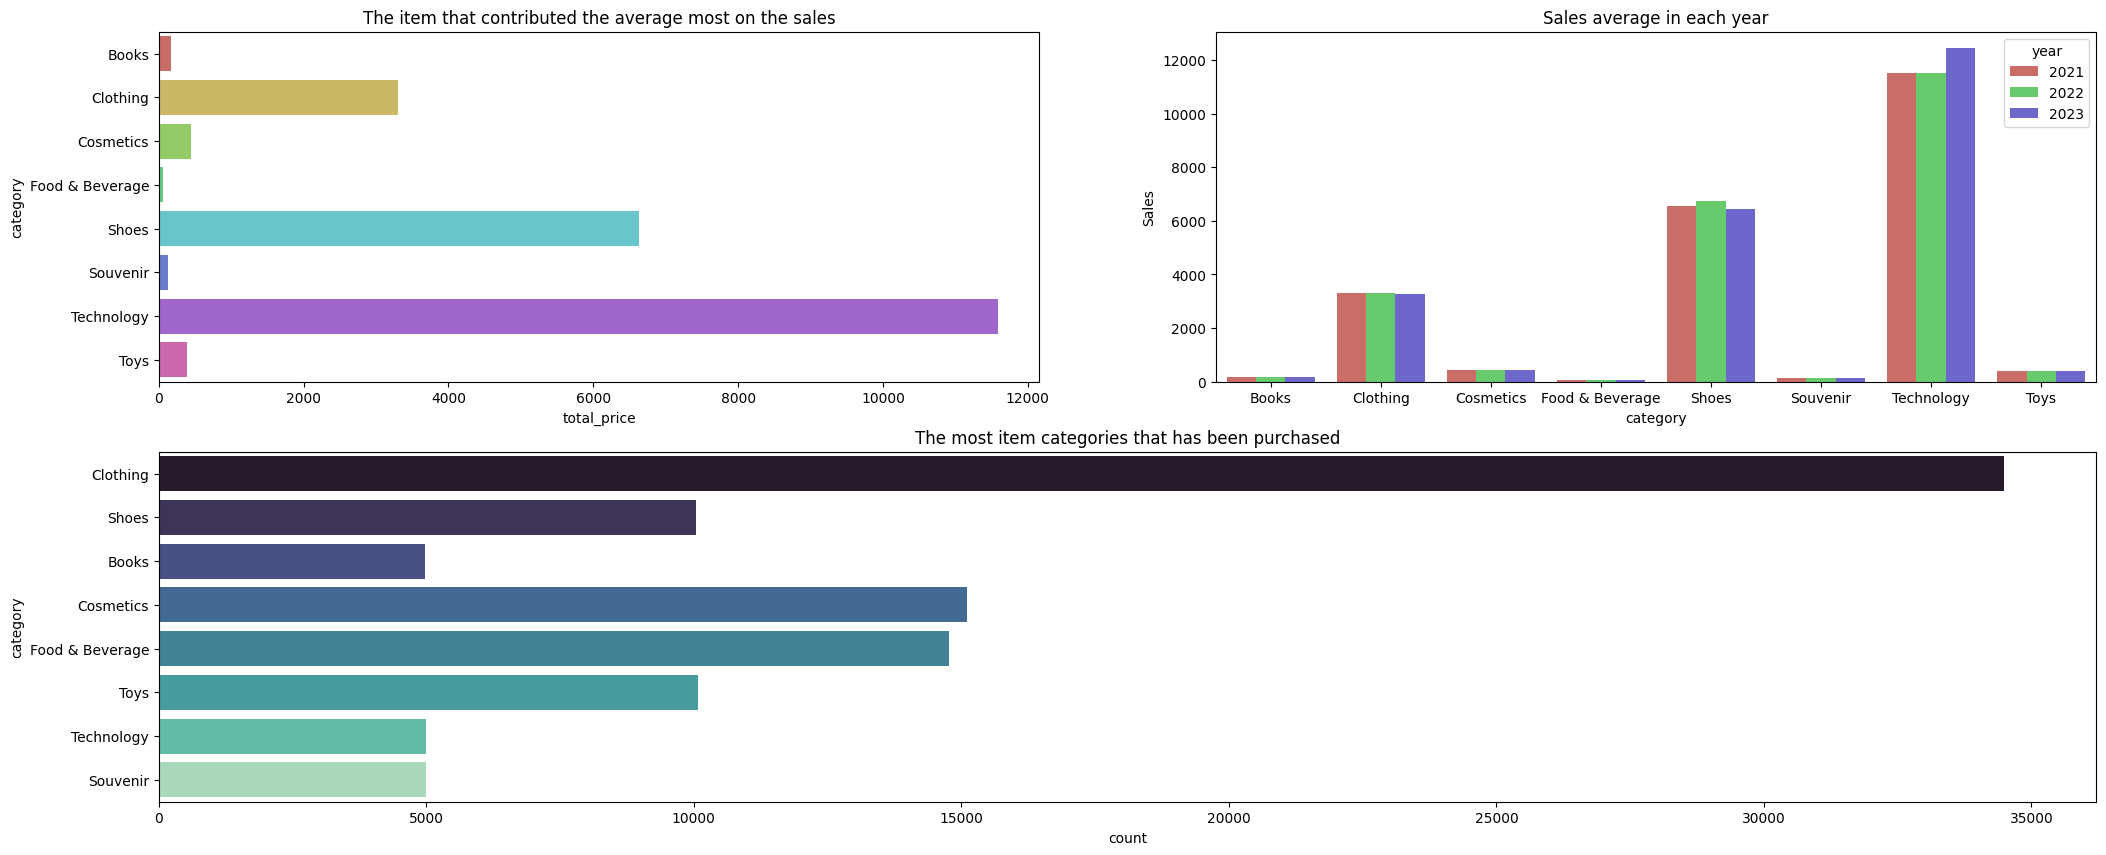

In [ ]:
fig = plt.figure(figsize=(25,10))

# Let's see the most item categories that has been purchased
ax1 = fig.add_subplot(212)

sns.countplot(df,y='category',palette='mako')
ax1.set_title('The most item categories that has been purchased')

# The item that contributed the most on the sales
ax2 = fig.add_subplot(221)
most_sales = df.groupby('category').mean().reset_index()

sns.barplot(most_sales,x='total_price',y='category',palette='hls')
ax2.set_title("The item that contributed the average most on the sales")

# Sales in each year
ax3 = fig.add_subplot(222)
sales_year = df.groupby(['category','year']).mean().reset_index()

sns.barplot(sales_year,x='category',y='total_price',hue='year',palette='hls')
ax3.set_title("Sales average in each year")
ax3.set_ylabel("Sales")

## 4. Rata-rata Penjualan untuk setiap item di mal yang berbeda

In [ ]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'pink', 'black']

df_mall_cat = df.groupby(["shopping_mall", 'category'])['total_price'].mean().unstack('category')

fig = px.bar(df_mall_cat, barmode='stack', color_discrete_sequence=colors)

fig.update_layout(
    title="Average sales for each item in different mall",
    xaxis_title="Shopping Mall",
    yaxis_title="Sales",
    xaxis=dict(tickangle=35),
    legend_title="Category",
    width=1000,
    height=600,
    margin=dict(l=20, r=20, t=40, b=20),
)

fig.show()

In [ ]:
df.groupby(["shopping_mall",'category'])['total_price'].mean().unstack('category')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,172.639535,3300.359329,438.816940,57.008355,6620.242551,123.849250,11919.140625,397.098833
Emaar Square Mall,177.948305,3386.123804,445.976000,58.686344,6204.166988,125.278300,11765.589354,385.975172
Forum Istanbul,166.890476,3350.170179,458.665922,55.003146,7266.250328,125.973908,10755.769231,375.543804
Istinye Park,164.682468,3356.367504,449.491001,57.663383,6634.846374,133.835883,11164.065708,394.345931
Kanyon,160.936969,3305.486491,453.043592,57.235150,6635.196247,122.853934,11980.742227,397.703150
Mall of Istanbul,168.039366,3314.663828,448.366485,57.889043,6657.347899,134.536171,11630.530973,395.261440
Metrocity,167.435705,3270.063128,437.907302,57.888922,6533.490988,127.678984,11151.489637,399.964937
Metropol AVM,175.880042,3281.725957,441.771823,58.429822,6657.192933,127.815028,11482.112069,400.103466
Viaport Outlet,161.107317,3281.378314,473.351090,56.837899,6427.977686,121.418533,11976.562500,388.324660


## 5. Penjualan terbanyak di pusat perbelanjaan

In [ ]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'pink', 'black']
df_mall = df.groupby("shopping_mall")["total_price"].sum().reset_index()
fig = px.bar(df_mall, x='shopping_mall', y='total_price', color='shopping_mall', color_discrete_sequence=colors)

fig.update_layout(
    title='Most Sales of Shopping Malls',
    xaxis_title='Shopping Mall',
    yaxis_title='Sales',
    width=1000,
    height=600,
    margin=dict(l=20, r=20, t=40, b=20),
)
fig.show()

## 6. Penjualan untuk setiap kategori

In [ ]:
# Average sales for each category with box plot
px.box(df , y= 'total_price', color='category')

## 7. Hari apa dalam seminggu yang transaksinya paling banyak

In [ ]:
dw_mapping={
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df_sorted_weekday = df.sort_values(['weekday'], ascending=True, axis=0, inplace=False)

fig = px.line(df_sorted_weekday['weekday'].value_counts().sort_index(),
              labels={'index': 'Day', 'value': 'Number of Transactions'},
              title='Most Transaction Day in a Week',
              line_shape='linear',  # You can use 'linear' or 'hv' for line shape
              height=500,
              width=800,
              color_discrete_sequence=['black'])

# Adjust layout for better appearance
fig.update_layout(
    xaxis_title=None,
    yaxis_title='Number of Transactions',
    margin=dict(l=0, r=0, b=30, t=50),  # Adjust margins for better spacing
)

# Show the figure
fig.show()

## 8. Tahun berapa penjualan terbanyak

In [ ]:
colors = ['red', 'green', 'blue']
df_most_sales = df.groupby('year').sum().reset_index()

fig = px.bar(df_most_sales,
             x='total_price',
             y='year',
             orientation='h',
             color='year',
             color_discrete_sequence=colors,
             labels={'total_price': 'Number of Sales', 'year': 'Year'},
             title='Total Sales in 3 years',
             width=800,
             height=500
            )

fig.update_layout(xaxis_title='Number of Sales', yaxis_title='Years')

fig.show()

<ipython-input-28-2ca21c74b90b>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## 9. Bulan dengan Pesanan Pembelian Tertinggi

In [ ]:
fig = px.bar(df,
             x=df['month'].value_counts().index,
             y=df['month'].value_counts().values,
             labels={'x': 'Month', 'y': 'Total Sales'},
             title='Total Sales per Month',
             color_discrete_sequence=['lightsalmon'])

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Sales',
    showlegend=False,  # Do not show legend for a single bar color
    plot_bgcolor='white',  # Set plot background color
    xaxis=dict(tickmode='linear'),  # Ensure all months are displayed
    yaxis=dict(gridcolor='lightgray'),  # Add grid lines for better readability
    margin=dict(l=0, r=0, b=30, t=50),  # Adjust margins for better spacing
)

fig.show()

## 10. Metode pembayaran mana yang paling banyak digunakan oleh pelanggan

In [ ]:
fig = px.histogram(
    df,
    x='payment_method',
    title="Frequency use of different payment methods",
    color='payment_method',
    color_discrete_map={'method_1': 'skyblue', 'method_2': 'salmon', 'method_3': 'lightgreen'},
    template='plotly_white',
    labels={'payment_method': 'Payment Method', 'count': 'Frequency'},
    width=800,
    height=400,
)
fig.show()

## 11. Jenis Kelamin Dan Kategori Pilihannya

In [ ]:
gender_counts = df.groupby(['category', 'gender']).size().reset_index(name='count').sort_values(by='count', ascending=False)
gender_counts

,category,gender,count
2,Clothing,Female,20652
3,Clothing,Male,13835
4,Cosmetics,Female,9070
6,Food & Beverage,Female,8804
14,Toys,Female,6085
5,Cosmetics,Male,6027
7,Food & Beverage,Male,5972
8,Shoes,Female,5967
9,Shoes,Male,4067
15,Toys,Male,4002


In [ ]:
fig = px.bar(gender_counts,
             x='category',
             y='count',
             color='gender',
             labels={'count': 'Count', 'category': 'Category'},
             title='Distribution of Categories by Gender',
             text='count',  # Display count value on top of bars
             height=500,  # Set chart height
             width=800,   # Set chart width
             color_discrete_map={'Male': 'lightblue', 'Female': 'lightpink'})  # Set color for each gender

fig.update_layout(
    xaxis_title=None,
    yaxis_title='Count',
    legend_title='Gender',
    margin=dict(l=0, r=0, b=30, t=50),  # Adjust margins for better spacing
)

fig.show()

## 12.  Metode pembayaran yang paling banyak digunakan pada setiap usia

In [ ]:
age_payment =df.groupby(['Age_Range'])['payment_method'].value_counts().to_frame()
age_payment.rename(columns={'payment_method':'Total'}, inplace = True)
age_payment = age_payment.reset_index()
age_payment

,Age_Range,payment_method,Total
0,10-20,Cash,2502
1,10-20,Credit Card,1998
2,10-20,Debit Card,1124
3,21-30,Cash,8675
4,21-30,Credit Card,6787
5,21-30,Debit Card,3938
6,31-50,Cash,17082
7,31-50,Credit Card,13471
8,31-50,Debit Card,7779
9,51-70,Cash,16188


In [ ]:
custom_colors = {'Credit Card': 'pink', 'Cash': 'red', 'Debit Card': 'blue'}

fig = px.bar(age_payment,
             x='Age_Range',
             y='Total',
             color='payment_method',
             barmode='group',
             labels={'Age_Range': 'Ages', 'Total': 'Total'},
             title='Total Payments by Age Range and Payment Method',
             color_discrete_map=custom_colors,
             height=500,
             width=800)

fig.update_layout(
    xaxis_title=None,
    yaxis_title='Total',
    legend_title='Payment Method',
    margin=dict(l=0, r=0, b=30, t=50),  # Adjust margins for better spacing
)

fig.show()

## 13. Total Penjualan Sepanjang Tahun

In [ ]:
sales_allyears = df.groupby(['month','year'])['total_price'].sum().reset_index()
sales_allyears

,month,year,total_price
0,1,2021,9641614.62
1,1,2022,9764311.14
2,1,2023,9485599.83
3,2,2021,8772315.22
4,2,2022,8344111.92
5,2,2023,9508662.96
6,3,2021,9455359.38
7,3,2022,9986685.16
8,3,2023,2514146.79
9,4,2021,9389541.54


In [ ]:
px.line(sales_allyears, x='month' , y='total_price' , color='year')

## 14. Kinerja Mal selama bertahun-tahun

In [ ]:
perform_mall =df.groupby(['month','shopping_mall','year'])['total_price'].sum().reset_index()
perform_mall

,month,shopping_mall,year,total_price
0,1,Cevahir AVM,2021,483830.06
1,1,Cevahir AVM,2022,504034.80
2,1,Cevahir AVM,2023,393095.34
3,1,Emaar Square Mall,2021,448750.27
4,1,Emaar Square Mall,2022,524683.65
...,...,...,...,...
265,12,Metropol AVM,2022,968527.89
266,12,Viaport Outlet,2021,488082.85
267,12,Viaport Outlet,2022,557528.73
268,12,Zorlu Center,2021,481931.31


In [ ]:
px.bar(perform_mall, x='year', y='total_price', color='shopping_mall', barmode='group')

## 15. Korelasi



In [ ]:
# The Correlation Age & Bill Price
df[['age','total_price']].corr()

,age,total_price
age,1.000000,0.002731
total_price,0.002731,1.000000


In [ ]:
px.imshow(df[['age','total_price']].corr(),text_auto=True , color_continuous_scale= 'redor')

In [ ]:
# Correlation matrix for each features
df_corr = df.corr() # Generate correlation matrix
df_corr

<ipython-input-41-35af1e3bcf62>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,quantity,price,total_price,year,month,day,weekday
age,1.000000,0.000667,0.001694,0.002731,-0.002390,0.006048,0.008174,-0.000845
quantity,0.000667,1.000000,0.344880,0.461173,0.000821,0.002731,0.000491,-0.009892
price,0.001694,0.344880,1.000000,0.962372,-0.000831,0.001055,-0.000336,-0.005702
total_price,0.002731,0.461173,0.962372,1.000000,0.000576,0.001771,-0.001080,-0.006128
year,-0.002390,0.000821,-0.000831,0.000576,1.000000,-0.255479,-0.036800,-0.003144
month,0.006048,0.002731,0.001055,0.001771,-0.255479,1.000000,0.019972,0.000007
day,0.008174,0.000491,-0.000336,-0.001080,-0.036800,0.019972,1.000000,-0.003255
weekday,-0.000845,-0.009892,-0.005702,-0.006128,-0.003144,0.000007,-0.003255,1.000000


In [ ]:
fig = px.imshow(df_corr.values, x=df_corr.columns, y=df_corr.index)
fig.update_layout(
    width=800,
    height=600,
)
fig.show()

# **RFM ANALYSIS**

In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price,year,month,day,weekday,dayofweek,Age_Range
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022,8,5,4,Friday,21-30
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021,12,12,6,Sunday,21-30
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021,11,9,1,Tuesday,10-20
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021,5,16,6,Sunday,51-70
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021,10,24,6,Sunday,51-70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  total_price     99457 non-null  float64       
 11  year            99457 non-null  int64         
 12  month           99457 non-null  int64         
 13  day             99457 non-null  int64         
 14  weekday         99457 non-null  int64         
 15  da

In [ ]:
df_new = df[['customer_id', 'invoice_date', 'invoice_no', 'total_price', 'category', 'age']]

In [ ]:
df_new.head()

,customer_id,invoice_date,invoice_no,total_price,category,age
0,C241288,2022-08-05,I138884,7502.00,Clothing,28
1,C111565,2021-12-12,I317333,5401.53,Shoes,21
2,C266599,2021-11-09,I127801,300.08,Clothing,20
3,C988172,2021-05-16,I173702,15004.25,Shoes,66
4,C189076,2021-10-24,I337046,242.40,Books,53


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   99457 non-null  object        
 1   invoice_date  99457 non-null  datetime64[ns]
 2   invoice_no    99457 non-null  object        
 3   total_price   99457 non-null  float64       
 4   category      99457 non-null  object        
 5   age           99457 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 4.6+ MB


In [ ]:
print('tanggal pertama: ', df_new['invoice_date'].min(), ', tanggal terakhir:', df_new['invoice_date'].max())

tanggal pertama:  2021-01-01 00:00:00 , tanggal terakhir: 2023-03-08 00:00:00


In [ ]:
# Tentukan periode setahun terakhir
end_date = df_new['invoice_date'].max()
start_date = end_date - pd.DateOffset(months=12)

# Filter data untuk hanya menyertakan transaksi dalam 12 bulan terakhir
df_last_year = df_new[df_new['invoice_date'] >= start_date]

In [ ]:
# diurutkan berdasarkan invoice_date
filter_data = df_last_year.sort_values(by='invoice_date')

In [ ]:
filter_data

,customer_id,invoice_date,invoice_no,total_price,category,age
37293,C163733,2022-03-08,I124497,2700.72,Clothing,40
93063,C146009,2022-03-08,I337709,2400.68,Shoes,26
87220,C233164,2022-03-08,I886346,47.07,Food & Beverage,46
62056,C171866,2022-03-08,I189616,40.66,Cosmetics,33
83380,C316286,2022-03-08,I271593,2400.68,Shoes,34
...,...,...,...,...,...,...
39881,C856309,2023-03-08,I535204,1200.32,Clothing,54
5508,C181049,2023-03-08,I300597,15004.25,Shoes,25
10548,C123400,2023-03-08,I249193,2700.72,Clothing,62
49365,C198534,2023-03-08,I177662,5401.53,Shoes,64


In [ ]:
# Hitung recency, frequency, dan monetary value
rfm_data = filter_data.groupby(['customer_id']).agg({
    'invoice_date': lambda x: (end_date - x.max()).days,  # Recency
    'invoice_no': 'count',  # Frequency
    'total_price': 'sum' , # Monetary Value
    "category": lambda category: ", ".join(category.unique()),
    "age": "max"
})


In [ ]:
rfm_data

,invoice_date,invoice_no,total_price,category,age
customer_id,,,,,
C100005,5,1,2400.68,Shoes,34
C100006,97,1,322.56,Toys,44
C100030,146,1,4801.28,Clothing,46
C100066,218,1,322.56,Toys,46
C100078,97,1,60.60,Books,64
...,...,...,...,...,...
C999854,28,1,130.75,Food & Beverage,27
C999886,0,1,47.07,Food & Beverage,61
C999910,123,1,136.35,Books,41


In [ ]:
# Ubah nama kolom agar sesuai dengan RFM
rfm_data.rename(columns={
    'invoice_date': 'Recency',
    'invoice_no': 'Frequency',
    'total_price': 'Monetary'
}, inplace=True)

In [ ]:
rfm_data

,Recency,Frequency,Monetary,category,age
customer_id,,,,,
C100005,5,1,2400.68,Shoes,34
C100006,97,1,322.56,Toys,44
C100030,146,1,4801.28,Clothing,46
C100066,218,1,322.56,Toys,46
C100078,97,1,60.60,Books,64
...,...,...,...,...,...
C999854,28,1,130.75,Food & Beverage,27
C999886,0,1,47.07,Food & Beverage,61
C999910,123,1,136.35,Books,41


In [ ]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45891 entries, C100005 to C999976
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    45891 non-null  int64  
 1   Frequency  45891 non-null  int64  
 2   Monetary   45891 non-null  float64
 3   category   45891 non-null  object 
 4   age        45891 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ MB


In [ ]:
# Definisikan variabel quartiles
quantiles = rfm_data.quantile(q=[0.25, 0.5, 0.75])

<ipython-input-57-e305e8e79d99>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
print(quantiles, type(quantiles))

      Recency  Frequency  Monetary   age
0.25     91.0        1.0    130.75  30.0
0.50    183.0        1.0    600.17  43.0
0.75    274.0        1.0   2700.72  56.0 <class 'pandas.core.frame.DataFrame'>


In [ ]:
quartiles=quantiles.to_dict()
quartiles

{'Recency': {0.25: 91.0, 0.5: 183.0, 0.75: 274.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 130.75, 0.5: 600.17, 0.75: 2700.7200000000003},
 'age': {0.25: 30.0, 0.5: 43.0, 0.75: 56.0}}

In [ ]:
## for Recency
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

## for Frequency and Monetary
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

## for Frequency and Monetary
def FClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
rfmSeg = rfm_data
rfmSeg['R'] = rfmSeg['Recency'].apply(RClass, args=('Recency',quartiles,))
rfmSeg['F'] = rfmSeg['Frequency'].apply(FClass, args=('Frequency',quartiles,))
rfmSeg['M'] = rfmSeg['Monetary'].apply(FMClass, args=('Monetary',quartiles,))

In [ ]:
rfmSeg['RFM_Class'] = rfmSeg.R.map(str) \
                            + rfmSeg.F.map(str) \
                            + rfmSeg.M.map(str)

In [ ]:
rfmSeg.head()

,Recency,Frequency,Monetary,category,age,R,F,M,RFM_Class
customer_id,,,,,,,,,
C100005,5,1,2400.68,Shoes,34,1,1,3,113
C100006,97,1,322.56,Toys,44,2,1,2,212
C100030,146,1,4801.28,Clothing,46,2,1,4,214
C100066,218,1,322.56,Toys,46,3,1,2,312
C100078,97,1,60.60,Books,64,2,1,1,211


In [ ]:
rfmSeg.sort_values(by=['RFM_Class', 'Monetary'], ascending=[True, False])

,Recency,Frequency,Monetary,category,age,R,F,M,RFM_Class
customer_id,,,,,,,,,
C101377,34,1,130.75,Food & Beverage,27,1,1,1,111
C102713,22,1,130.75,Food & Beverage,64,1,1,1,111
C103479,9,1,130.75,Food & Beverage,29,1,1,1,111
C103597,53,1,130.75,Food & Beverage,36,1,1,1,111
C105467,51,1,130.75,Food & Beverage,37,1,1,1,111
...,...,...,...,...,...,...,...,...,...
C767101,353,1,4200.00,Technology,60,4,1,4,414
C904845,291,1,4200.00,Technology,27,4,1,4,414
C907308,278,1,4200.00,Technology,64,4,1,4,414


In [ ]:
rfmSeg.groupby('RFM_Class').agg('Monetary').mean()

RFM_Class
111      52.017276
112     314.891058
113    1601.411268
114    8628.024021
211      51.991155
212     319.012078
213    1564.557622
214    8624.452142
311      51.754910
312     314.035072
313    1590.071839
314    8550.709480
411      51.818541
412     317.364564
413    1580.351887
414    8467.177213
Name: Monetary, dtype: float64

In [ ]:
rfmSeg['Total Score'] = rfmSeg['R'] + rfmSeg['F'] +rfmSeg['M']

In [ ]:
rfmSeg.head()

,Recency,Frequency,Monetary,category,age,R,F,M,RFM_Class,Total Score
customer_id,,,,,,,,,,
C100005,5,1,2400.68,Shoes,34,1,1,3,113,5
C100006,97,1,322.56,Toys,44,2,1,2,212,5
C100030,146,1,4801.28,Clothing,46,2,1,4,214,7
C100066,218,1,322.56,Toys,46,3,1,2,312,6
C100078,97,1,60.60,Books,64,2,1,1,211,4


In [ ]:
rfmSeg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45891 entries, C100005 to C999976
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      45891 non-null  int64  
 1   Frequency    45891 non-null  int64  
 2   Monetary     45891 non-null  float64
 3   category     45891 non-null  object 
 4   age          45891 non-null  int64  
 5   R            45891 non-null  int64  
 6   F            45891 non-null  int64  
 7   M            45891 non-null  int64  
 8   RFM_Class    45891 non-null  object 
 9   Total Score  45891 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 3.9+ MB


In [ ]:
rfmSeg

,Recency,Frequency,Monetary,category,age,R,F,M,RFM_Class,Total Score
customer_id,,,,,,,,,,
C100005,5,1,2400.68,Shoes,34,1,1,3,113,5
C100006,97,1,322.56,Toys,44,2,1,2,212,5
C100030,146,1,4801.28,Clothing,46,2,1,4,214,7
C100066,218,1,322.56,Toys,46,3,1,2,312,6
C100078,97,1,60.60,Books,64,2,1,1,211,4
...,...,...,...,...,...,...,...,...,...,...
C999854,28,1,130.75,Food & Beverage,27,1,1,1,111,3
C999886,0,1,47.07,Food & Beverage,61,1,1,1,111,3
C999910,123,1,136.35,Books,41,2,1,2,212,5


In [ ]:
# rfmSeg['RFM_Segment'] = ''
# rfmSeg.loc[(rfmSeg['R'] <= 2) & (rfmSeg['F'] >= 4) & (rfmSeg['M'] >= 4), 'RFM_Segment'] = 'Superstar'
# rfmSeg.loc[(rfmSeg['R'] <= 3) & (rfmSeg['F'] >= 3) & (rfmSeg['M'] >= 3), 'RFM_Segment'] = 'Golden Customer'
# rfmSeg.loc[(rfmSeg['R'] >= 3) & (rfmSeg['F'] >= 3) & (rfmSeg['M'] >= 3), 'RFM_Segment'] = 'Typical Customer'
# rfmSeg.loc[(rfmSeg['R'] >= 3) & (rfmSeg['F'] >= 3) & (rfmSeg['M'] <= 2), 'RFM_Segment'] = 'Occasional Customer'
# rfmSeg.loc[(rfmSeg['R'] >= 3) & (rfmSeg['F'] <= 3) & (rfmSeg['M'] >= 3), 'RFM_Segment'] = 'Everyday Shopper'
# rfmSeg.loc[(rfmSeg['R'] >= 3) & (rfmSeg['F'] <= 3) & (rfmSeg['M'] <= 2), 'RFM_Segment'] = 'Dormant Customer'

In [ ]:
rfmSeg['RFM_Segment'] = ''

for index, row in rfmSeg.iterrows():
    if row['R'] <= 2 and row['F'] >= 4 and row['M'] >= 4:
        rfmSeg.at[index, 'RFM_Segment'] = 'Superstar'
    elif row['R'] <= 3 and row['F'] >= 3 and row['M'] >= 3:
        rfmSeg.at[index, 'RFM_Segment'] = 'Golden Customer'
    elif row['R'] >= 3 and row['F'] >= 3 and row['M'] >= 3:
        rfmSeg.at[index, 'RFM_Segment'] = 'Typical Customer'
    elif row['R'] >= 3 and row['F'] >= 3 and row['M'] <= 2:
        rfmSeg.at[index, 'RFM_Segment'] = 'Occasional Customer'
    elif row['R'] >= 3 and row['F'] <= 3 and row['M'] >= 3:
        rfmSeg.at[index, 'RFM_Segment'] = 'Everyday Shopper'
    elif row['R'] <= 3 and row['F'] >= 3 and row['M'] <= 2:
        rfmSeg.at[index, 'RFM_Segment'] = 'Dormant Customer'
    else:
        # Menambahkan kondisi default untuk kasus lainnya
        rfmSeg.at[index, 'RFM_Segment'] = 'Undefined Segment'

In [ ]:
rfmSeg

,Recency,Frequency,Monetary,category,age,R,F,M,RFM_Class,Total Score,RFM_Segment
customer_id,,,,,,,,,,,
C100005,5,1,2400.68,Shoes,34,1,1,3,113,5,Undefined Segment
C100006,97,1,322.56,Toys,44,2,1,2,212,5,Undefined Segment
C100030,146,1,4801.28,Clothing,46,2,1,4,214,7,Undefined Segment
C100066,218,1,322.56,Toys,46,3,1,2,312,6,Undefined Segment
C100078,97,1,60.60,Books,64,2,1,1,211,4,Undefined Segment
...,...,...,...,...,...,...,...,...,...,...,...
C999854,28,1,130.75,Food & Beverage,27,1,1,1,111,3,Undefined Segment
C999886,0,1,47.07,Food & Beverage,61,1,1,1,111,3,Undefined Segment
C999910,123,1,136.35,Books,41,2,1,2,212,5,Undefined Segment


In [ ]:
rfmSeg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45891 entries, C100005 to C999976
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      45891 non-null  int64  
 1   Frequency    45891 non-null  int64  
 2   Monetary     45891 non-null  float64
 3   category     45891 non-null  object 
 4   age          45891 non-null  int64  
 5   R            45891 non-null  int64  
 6   F            45891 non-null  int64  
 7   M            45891 non-null  int64  
 8   RFM_Class    45891 non-null  object 
 9   Total Score  45891 non-null  int64  
 10  RFM_Segment  45891 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 5.2+ MB


In [ ]:
rfmSegSort = rfmSeg.sort_values(by='RFM_Class')
rfmSegSort

,Recency,Frequency,Monetary,category,age,R,F,M,RFM_Class,Total Score,RFM_Segment
customer_id,,,,,,,,,,,
C259209,77,1,35.84,Toys,18,1,1,1,111,3,Undefined Segment
C284726,71,1,130.75,Food & Beverage,40,1,1,1,111,3,Undefined Segment
C284709,45,1,46.92,Souvenir,23,1,1,1,111,3,Undefined Segment
C284548,77,1,35.84,Toys,44,1,1,1,111,3,Undefined Segment
C128802,3,1,35.84,Toys,58,1,1,1,111,3,Undefined Segment
...,...,...,...,...,...,...,...,...,...,...,...
C481603,361,1,15004.25,Shoes,40,4,1,4,414,9,Everyday Shopper
C481189,345,1,5401.53,Shoes,41,4,1,4,414,9,Everyday Shopper
C481043,340,1,7502.00,Clothing,23,4,1,4,414,9,Everyday Shopper


In [ ]:
segment_counts = rfmSeg['RFM_Segment'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segment', 'Count']

fig = px.bar(segment_counts,
             x='RFM_Segment',
             y='Count',
             title='RFM Segmentation Bar Chart',
             color='Count',
             color_continuous_scale='Viridis')
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
segment_counts = rfmSeg['RFM_Segment'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segment', 'Count']

fig = px.pie(segment_counts,
             names='RFM_Segment',
             values='Count',
             title='RFM Segmentation Pie Chart',
             color='Count',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(width=800, height=600)
fig.show()

# Pengolahan Data sebelum Klustering


In [ ]:
rfmSeg.head()

,Recency,Frequency,Monetary,category,age,R,F,M,RFM_Class,Total Score,RFM_Segment
customer_id,,,,,,,,,,,
C100005,5,1,2400.68,Shoes,34,1,1,3,113,5,Undefined Segment
C100006,97,1,322.56,Toys,44,2,1,2,212,5,Undefined Segment
C100030,146,1,4801.28,Clothing,46,2,1,4,214,7,Undefined Segment
C100066,218,1,322.56,Toys,46,3,1,2,312,6,Undefined Segment
C100078,97,1,60.60,Books,64,2,1,1,211,4,Undefined Segment


In [ ]:
dataKlustering = rfmSeg.drop(columns=['Recency', 'Frequency', 'Monetary', 'RFM_Class', 'Total Score', 'RFM_Segment'])
dataKlustering.head()

,category,age,R,F,M
customer_id,,,,,
C100005,Shoes,34,1,1,3
C100006,Toys,44,2,1,2
C100030,Clothing,46,2,1,4
C100066,Toys,46,3,1,2
C100078,Books,64,2,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataKlustering['category'] = label_encoder.fit_transform(dataKlustering['category'])
dataKlustering.head()

,category,age,R,F,M
customer_id,,,,,
C100005,4,34,1,1,3
C100006,7,44,2,1,2
C100030,1,46,2,1,4
C100066,7,46,3,1,2
C100078,0,64,2,1,1


# Penentuan K dengan Elbow

In [ ]:
!pip install yellowbrick

# Kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

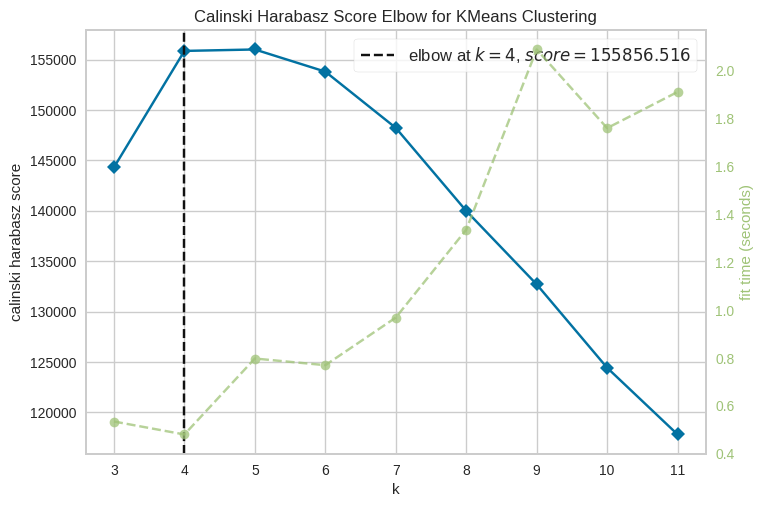

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='calinski_harabasz')

visualizer.fit(dataKlustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
from sklearn.cluster import KMeans
nKluster = 4
kmeans = KMeans(n_clusters=nKluster)
kmeans.fit(dataKlustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [ ]:
labels = kmeans.labels_

In [ ]:
labels

array([2, 2, 3, ..., 2, 1, 3], dtype=int32)

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
centers

array([[ 2.74774775, 63.50393551,  2.49246088,  1.        ,  2.47956377],
       [ 2.77037637, 24.50716309,  2.49494132,  1.        ,  2.47551599],
       [ 2.76282881, 38.02802932,  2.50521777,  1.        ,  2.46744286],
       [ 2.76412776, 50.96840997,  2.49061074,  1.        ,  2.48955774]])

In [ ]:
arrayData = dataKlustering.values
print(arrayData[0][1])

34


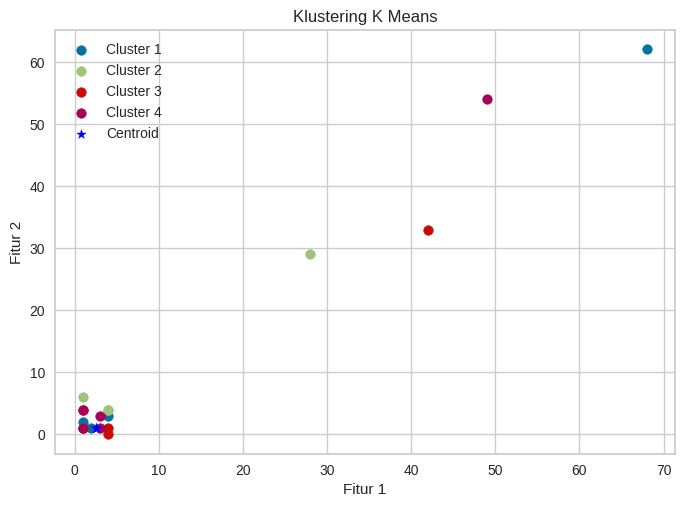

In [ ]:
plt.figure()

for i in range(nKluster):
  plt.scatter(arrayData[labels == i][2], arrayData[labels == i][3], label = f'Cluster {i+1}')

plt.scatter(centers[:, 2], centers[:, 3], marker='*', color = 'blue', label = 'Centroid' )
plt.title('Klustering K Means')
plt.legend()
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()
# fig = px.histogram(
#     df,
#     x='payment_method',
#     title="Frequency use of different payment methods",
#     color='payment_method',
#     color_discrete_map={'method_1': 'skyblue', 'method_2': 'salmon', 'method_3': 'lightgreen'},
#     template='plotly_white',
#     labels={'payment_method': 'Payment Method', 'count': 'Frequency'},
#     width=800,
#     height=400,
# )
# fig.show()

In [ ]:
from sklearn.metrics import  silhouette_score
from sklearn.metrics import  davies_bouldin_score

score =  silhouette_score(dataKlustering, labels)
scoreDavies = davies_bouldin_score(dataKlustering, labels)

In [ ]:
score # 1 Best ,  -1 Worst

0.47442351202293775

In [ ]:
scoreDavies  #Best Value = 0

0.6605417294197038

# Fuzzy C Means

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=7a0e72a5552dc3d8c14acd59048081dc0916057381cf2d60e62f73147e245a82
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzzy

In [ ]:
# Instantiate the clustering model and visualizer
# model = fuzzy.cluster.cmeans(arrayData.T, nKluster, 2, error=0.005, maxiter = 500)
# visualizer = KElbowVisualizer(model, k=(3,12), metric='calinski_harabasz')

# visualizer.fit(dataKlustering)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

In [ ]:
centorid, u, uO, d, jm, p, fpc = fuzzy.cluster.cmeans(arrayData.T, nKluster, 2, error=0.005, maxiter = 500)

In [ ]:
labelsC = np.argmax(u, axis = 0)

In [ ]:
labelsC

array([4, 3, 3, ..., 3, 4, 2])

In [ ]:
centorid

array([[ 2.65161567, 22.30744654,  2.49201952,  1.        ,  2.47346679],
       [ 2.62957742, 64.6982644 ,  2.50056339,  1.        ,  2.48218469],
       [ 2.61957323, 54.12479216,  2.49081538,  1.        ,  2.47546223],
       [ 2.60693687, 43.44079103,  2.49234781,  1.        ,  2.4850509 ],
       [ 2.64320339, 32.80570638,  2.50820464,  1.        ,  2.43939048]])

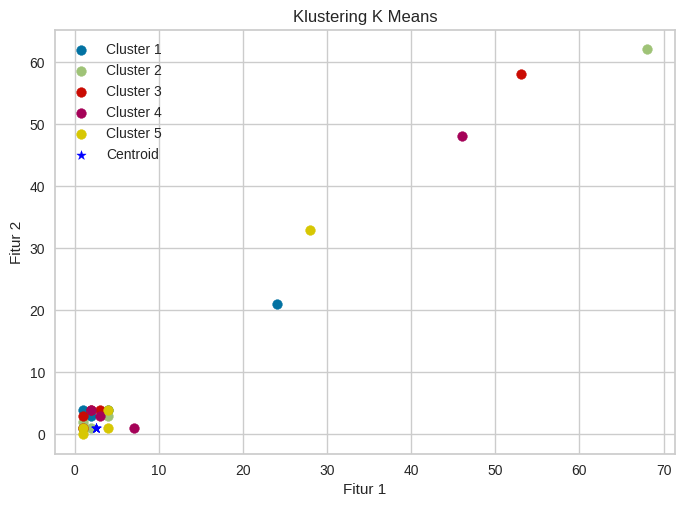

In [ ]:
plt.figure()

for i in range(nKluster):
  plt.scatter(arrayData[labelsC == i][2], arrayData[labelsC == i][3], label = f'Cluster {i+1}')

plt.scatter(centorid[:, 2], centorid[:, 3], marker='*', color = 'blue', label = 'Centroid' )
plt.title('Klustering K Means')
plt.legend()
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()

In [ ]:
# from sklearn.metrics import  silhouette_score
# from sklearn.metrics import  davies_bouldin_score

score =  silhouette_score(dataKlustering, labelsC)
scoreDavies = davies_bouldin_score(dataKlustering, labelsC)

print(score)
print(scoreDavies)

0.427660640490654
0.7251734203019516
